# 2. Rossby Waves (50 pts)
### Part 1 (25 pts)
For a baroclinic Rossby wave (RW) in the Pacific Ocean with a zonal wavelength of 600 km and no meridional wavelength:
1. In the midlatitudes at 35$^{\circ}$N is this a long or short Rossby wave?
2. Determine the phase speed ($c_p$) and group velocity ($c_g$) in the midlatitudes at 35$^{\circ}$N in units of **km day$^{-1}$**.
3. How long would it take the phase and energy to travel across the Pacific?
4. Repeat a)--c) for the tropics at 5$^{\circ}$N.

### Part 2 (25 pts)
Repeat Part 1 for the case of a barotropic Rossby wave in a 4000 m depth ocean.


In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Problem parameters
g = 9.81  # m s^-2
H = 4e3 # m
beta = 2e-11  # m^-1 s^-1
lat_mid = 35.  # deg N
lat_trop = 5.  # deg N
Omega = 7.29e-5  # rad s^-1

In [3]:
# Function to calculate the Coriolis parameter
def f(lat):
    return 2.*Omega*np.sin(lat*np.pi/180.)  # rad s^-1

In [4]:
wavelength = 600. # km
K = 2.*np.pi/wavelength  # km^-1  Zonal Wavenumber
display(Math(f'k = {round(K, 4)} \, \\text{{km}}^{{-1}}')) 

<IPython.core.display.Math object>

In [5]:
### Deformation Radii

# External
R_E_mid = np.sqrt(g*H)/f(lat_mid)/1e3 # km
R_E_trop = np.sqrt(g*H)/f(lat_trop)/1e3 # km
display(Math(r'R_E = {} \, \text{{km in the midlatitudes at }} {}^{{\circ}}\text{{N}}'.format(round(R_E_mid, -1), round(lat_mid))))
display(Math(r'R_E = {} \, \text{{km in the tropics at }} {}^{{\circ}}\text{{N}}'.format(round(R_E_trop, -1), round(lat_trop))))

# Internal (Chosen from lecture global map)
R_mid = 30. # km
R_trop = 200. # km

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Part 1, problem 1

The dispersion relation for a baroclinic RW with no meridional wavelength is as follows:
\begin{equation}
    \omega(k) = \frac{-\beta k}{k^2 + R^2_I} = \frac{-\beta/k}{1 + (kR_I)^{-2}}
\end{equation}
We need to determine the value of the ratio:

$(kR_I)^{-2} = (\lambda/2\pi R_I)^2$

In [6]:
(wavelength/(2.*np.pi*R_mid))**2

10.13211836423378

The ratio is much greater than 1 so that this is a long RW and the dispersion relation can be approximated as:

$ \displaystyle \omega(k)\approx -\beta R^2_I k $

### Part 1, problem 2

The phase speed ($c_p$) is approximately:
\begin{equation}
    c_p = \frac{\omega}{k} = \frac{-\beta}{k^2 + R^2_I} \approx -\beta R^2_I
\end{equation}

The group velocity ($c_g$) is approximately the same as the phase speed:
\begin{equation}
    c_g = \frac{\partial\omega}{\partial k} \approx -\beta R^2_I
\end{equation}

In [7]:
# Functions to calculate angular frequency and phase speed

# Inputs:
# k [km^-1]
# R [km]

def omega_rw(k, R):
    return -beta*(k/1.e3)/((k/1.e3)**2 + (R*1.e3)**(-2))*86400.  # day^-1

def cp_rw(k, R):
    return omega_rw(k, R)/k  # km day^-1

def cp_short(k):
    return -beta/((k/1.e3)**2)/1.e3*86400.  # km day^-1

def cp_long(R):
    return -(beta*(R*1.e3)**2)/1.e3*86400.  # km day^-1

def cg_long(R):
    return -(beta*(R*1.e3)**2)/1.e3*86400.  # km day^-1

def cg_short(k):
    return beta/((k/1.e3)**2)/1.e3*86400.  # km day^-1

In [8]:
# Phase speed & group velocity
cp_mid = cp_rw(K, R_mid)
cp_mid_long = cp_long(R_mid)
cg_mid_long = cg_long(R_mid)

display(Math(f'c_p = {round(cp_mid, 2)} \, \\text{{km/day}} \, \\text{{full solution for RWs}}'))
display(Math(f'c_p = {round(cp_mid_long, 2)} \, \\text{{km/day}} \, \\text{{approximate solution for long RWs}}'))
display(Math(f'c_g = {round(cg_mid_long, 2)} \, \\text{{km/day}} \, \\text{{approximate solution for long RWs}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The phase speed is not a function of wavenumber so that it is **nondispersive**.  The sign is negative for both the phase speed and group velocity so that there is westward propagation of the phase and energy at the same speed.

### Part 1, problem 3

The width ($L$) of the Pacific at 35$^{\circ}$N is approximate 100$^{\circ}$ of longitude.

$t = L/c_p$

In [9]:
L = -100.*111.*np.cos(lat_mid*np.pi/180.) # km
f'L = {round(L, 3)} km'

'L = -9092.588 km'

In [10]:
t = L/cp_mid/365
f't = {round(t, 1)} years'

't = 17.6 years'

It would take 17.6 year for the phase and energy to propagate across the Pacific at 35$^{\circ}$N.

### Part 1, problem 4

In [11]:
(wavelength/(2.*np.pi*R_trop))**2

0.22797266319526

The ratio is much smaller than 1 so that this is a short RW and the dispersion relation can be approximated as:

$ \displaystyle \omega(k)\approx -\beta / k $

The phase speed ($c_p$):
\begin{equation}
    c_p \approx -\frac{\beta}{k^2}
\end{equation}

The group velocity ($c_g$) is approximately the same as the phase speed
\begin{equation}
    c_g \approx \frac{\beta}{k^2}
\end{equation}

In [12]:
cp_trop = cp_rw(K, R_trop)
cp_trop_short = cp_short(K)
cg_trop_short = cg_short(K)

display(Math(f'c_p = {round(cp_trop, 2)} \, \\text{{km/day}} \, \\text{{full solution for RWs}}'))
display(Math(f'c_p = {round(cp_trop_short, 2)} \, \\text{{km/day}} \, \\text{{approximate solution for long RWs}}'))
display(Math(f'c_g = {round(cg_trop_short, 2)} \, \\text{{km/day}} \, \\text{{approximate solution for long RWs}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The baroclinic RWs in the tropics propagate much faster than those in the midlatitudes.  The phase does dependent on wavenumber so short RWs are **dispersive**. The phase propagates westward while the energy propagates eastward.  

In [13]:
L = -100.*111.*np.cos(lat_trop*np.pi/180.) # km
f'L = {round(L, 3)} km'

'L = -11057.761 km'

In [14]:
t = L/cp_trop/365
f't = {round(t, 1)} years'

't = 2.4 years'

It would take the phase to cross the Pacific at 5$^{\circ}$N 2.4 years.  If the wave initiated on the eastern side of the Pacific, the energy would not propagate across the ocean.

In [15]:
# Figures of omega vs. k and cp vs. k for baroclinic RWs in the midlatitudes and tropics
ci = 1.e-6
k = np.arange(-0.1, 0+ci, ci)  # km^-1
omega_mid = omega_rw(k, R_mid)
omega_trop = omega_rw(k, R_trop)
omega_baro_mid = omega_rw(k, R_E_mid)
omega_baro_trop = omega_rw(k, R_E_trop)

Text(0.5, 1.0, 'Tropics ($\\phi = $5$^{\\circ}$N)')

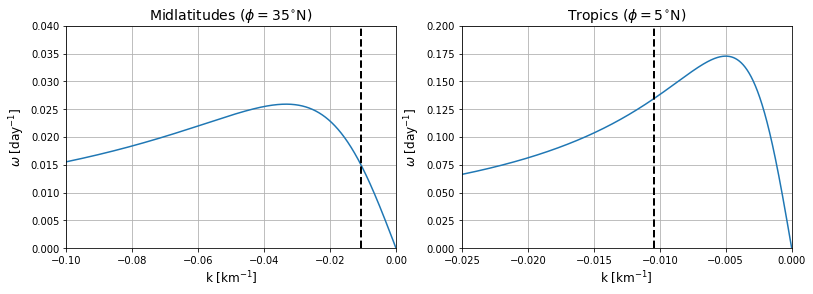

In [16]:
plt.rcParams['figure.figsize'] = 13, 9
fntsize = 12
fntsize_title = 14

y = np.arange(0, 1.5+0.01, 0.01)

plt.subplot(2, 2, 1)
plt.plot(k, omega_mid)
plt.plot(-2.*np.pi/wavelength*np.ones((y.size, )), y, '--k', linewidth=2)
plt.xlim(-0.1, 0)
plt.ylim(0, 0.04)
plt.xlabel('k [km$^{-1}$]', fontsize=fntsize)
plt.ylabel('$\omega$ [day$^{-1}$]', fontsize=fntsize)
plt.grid(True)
plt.title('Midlatitudes ($\phi = $' + str(round(lat_mid)) + '$^{\circ}$N)', fontsize=fntsize_title)

plt.subplot(2, 2, 2)
plt.plot(k, omega_trop)
plt.plot(-2.*np.pi/wavelength*np.ones((y.size, )), y, '--k', linewidth=2)
plt.xlim(-0.025, 0)
plt.ylim(0, 0.2)
plt.xlabel('k [km$^{-1}$]', fontsize=fntsize)
plt.ylabel('$\omega$ [day$^{-1}$]', fontsize=fntsize)
plt.grid(True)
plt.title('Tropics ($\phi = $' + str(round(lat_trop)) + '$^{\circ}$N)', fontsize=fntsize_title)

Text(0.5, 1.0, 'Tropics ($\\phi = $5$^{\\circ}$N)')

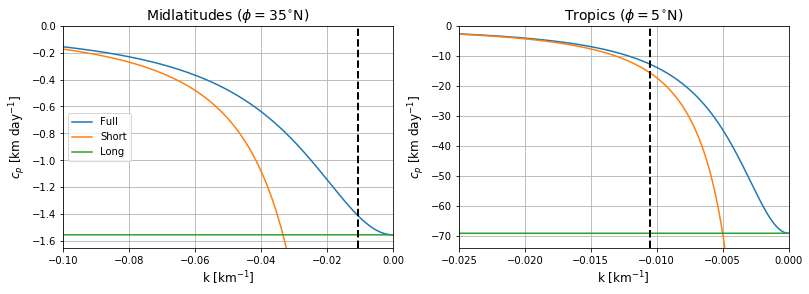

In [17]:
# Baroclinic RW Phase Speed Plots

cp_mid = cp_rw(k, R_mid)
cp_trop = cp_rw(k, R_trop)
cp_trop_long = cp_long(R_trop)

y = np.linspace(np.min(cp_mid)-0.1, 0)
y2 = np.linspace(np.min(cp_trop)-5, 0)
plt.subplot(2, 2, 1)
plt.plot(k, cp_mid)
plt.plot(k, cp_short(k))
plt.plot(k, cp_mid_long*np.ones((k.size, )))
plt.legend(('Full', 'Short', 'Long'))
plt.plot(-2.*np.pi/wavelength*np.ones((y.size, )), y, '--k', linewidth=2)
plt.xlim(-0.1, 0)
plt.ylim(np.min(cp_mid)-0.1, 0)
plt.xlabel('k [km$^{-1}$]', fontsize=fntsize)
plt.ylabel('$c_p$ [km day$^{-1}$]', fontsize=fntsize)
plt.grid(True)
plt.title('Midlatitudes ($\phi = $' + str(round(lat_mid)) + '$^{\circ}$N)', fontsize=fntsize_title)

plt.subplot(2, 2, 2)
plt.plot(k, cp_trop)
plt.plot(k, cp_short(k))
plt.plot(k, cp_trop_long*np.ones((k.size, )))
plt.plot(-2.*np.pi/wavelength*np.ones((y2.size, )), y2, '--k', linewidth=2)
plt.xlim(-0.025, 0)
plt.ylim(np.min(cp_trop)-5, 0)
plt.xlabel('k [km$^{-1}$]', fontsize=fntsize)
plt.ylabel('$c_p$ [km day$^{-1}$]', fontsize=fntsize)
plt.grid(True)
plt.title('Tropics ($\phi = $' + str(round(lat_trop)) + '$^{\circ}$N)', fontsize=fntsize_title)

### Part 2

In [18]:
(wavelength/(2.*np.pi*R_E_mid))**2

0.0016252172228679949

In [19]:
(wavelength/(2.*np.pi*R_E_trop))**2

3.752501115067509e-05

Barotropic RWs with a 600 km wavelength are short waves in both the midlatitudes and tropics.  Answers are the same as in **Part 1, problem 4**.